In [200]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = "data.csv"  # Update with your dataset's path
try:
    # Use appropriate encoding if needed
    data = pd.read_csv(file_path, encoding='latin1')
    print("Dataset successfully loaded!")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Step 2: Display initial info
print("\n--- Initial Dataset Info ---")
print(data.info())
print("\n--- First Few Rows ---")
print(data.head())

# Step 3: Check and remove duplicates
print("\n--- Removing Duplicates ---")
initial_rows = data.shape[0]
data = data.drop_duplicates()
print(f"Removed {initial_rows - data.shape[0]} duplicate rows.")

# Step 4: Handle missing values
print("\n--- Handling Missing Values ---")
missing_summary = data.isnull().sum()
print("Missing values per column:")
print(missing_summary)


C:\Users\rizwa\AppData\Local\Temp\ipykernel_6748\2635448960.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='latin1')


Dataset successfully loaded!

--- Initial Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12 

In [201]:
# Example handling:
# Drop columns with excessive missing values (e.g., >50% missing)
threshold = 0.5
columns_to_drop = missing_summary[missing_summary > threshold * len(data)].index
data = data.drop(columns=columns_to_drop)
print(f"Dropped columns with more than {threshold * 100}% missing values: {list(columns_to_drop)}")

# Fill missing numeric values with mean or median
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Drop rows with missing values in critical columns
critical_cols = ['state', 'location', 'sampling_date']  # Example critical columns
data = data.dropna(subset=critical_cols)
print(f"Remaining rows after handling missing values: {data.shape[0]}")


Dropped columns with more than 50.0% missing values: ['spm', 'pm2_5']
Remaining rows after handling missing values: 435065


In [202]:
# Step 5: Correct data types
print("\n--- Correcting Data Types ---")
# Convert date columns to datetime
if 'sampling_date' in data.columns:
    data['sampling_date'] = pd.to_datetime(data['sampling_date'], errors='coerce')
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Ensure station code is treated as string
if 'stn_code' in data.columns:
    data['stn_code'] = data['stn_code'].astype(str)

print("Data types corrected where applicable.")


--- Correcting Data Types ---
Data types corrected where applicable.


C:\Users\rizwa\AppData\Local\Temp\ipykernel_6748\4023115638.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['sampling_date'] = pd.to_datetime(data['sampling_date'], errors='coerce')


In [203]:
# Step 6: Initial Profiling
print("\n--- Initial Profiling ---")
# Basic statistics for numeric columns
print("\n--- Numeric Column Summary ---")
print(data.describe())

# Unique values for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("\n--- Unique Values in Categorical Columns ---")
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")

# Distribution of values in critical columns
print("\n--- State Distribution ---")
if 'state' in data.columns:
    print(data['state'].value_counts())


--- Initial Profiling ---

--- Numeric Column Summary ---
                       sampling_date            so2            no2  \
count                         412132  435065.000000  435065.000000   
mean   2010-10-05 23:33:04.082769408      10.830468      25.823296   
min              1987-01-01 00:00:00       0.000000       0.000000   
25%              2007-12-31 00:00:00       5.000000      14.000000   
50%              2011-03-05 00:00:00       9.000000      22.300000   
75%              2013-10-25 00:00:00      13.000000      32.000000   
max              2015-12-31 00:00:00     909.000000     876.000000   
std                              NaN      10.715279      18.149807   

                rspm                           date  
count  435065.000000                         435061  
mean      108.871711  2010-01-12 22:22:11.780141312  
min         0.000000            1987-01-01 00:00:00  
25%        59.000000            2007-07-03 00:00:00  
50%        98.000000            2010-11-

In [204]:
# Step 7: Save the cleaned dataset (optional)
cleaned_file_path = "cleaned_data.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: cleaned_data.csv


C:\Users\rizwa\AppData\Local\Temp\ipykernel_6748\1241484072.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)



--- Histograms for Numeric Variables ---


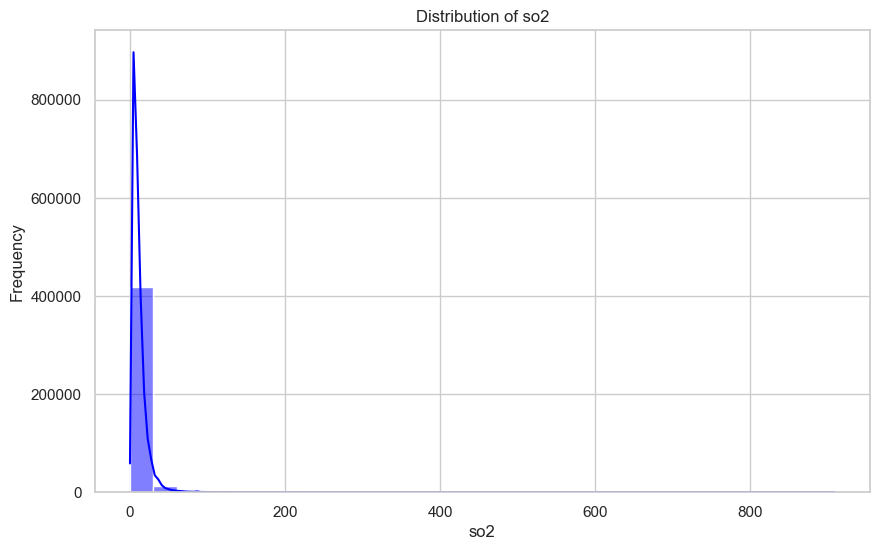

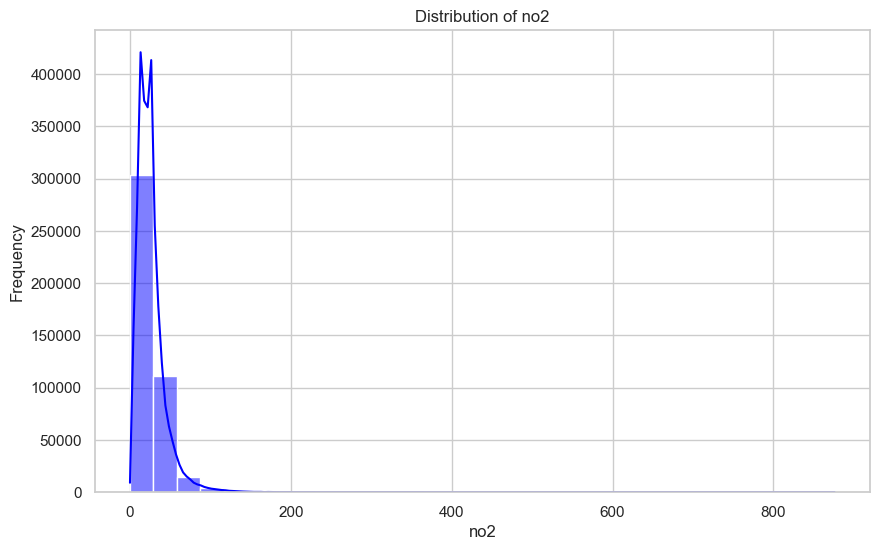

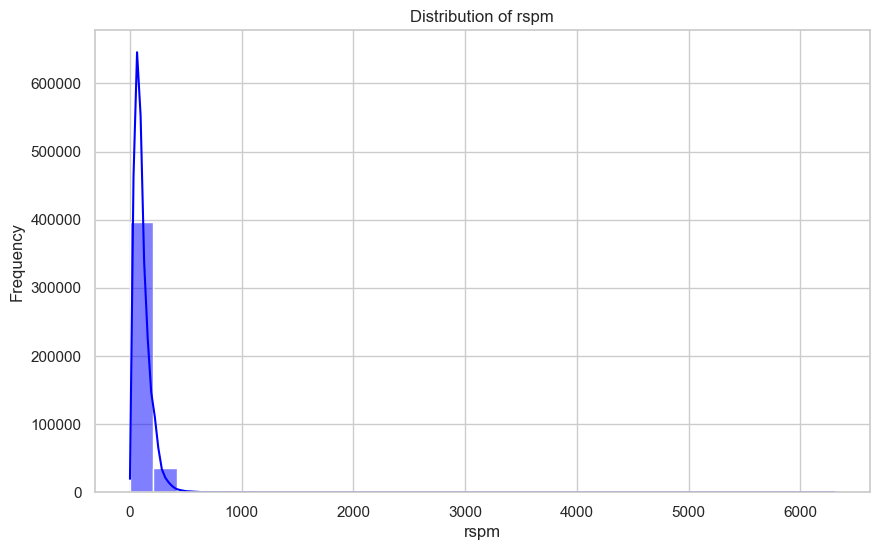

In [205]:
# Load the cleaned dataset
file_path = "cleaned_data.csv"  # Ensure this is the path to the cleaned dataset
data = pd.read_csv(file_path)

# Step 8: Set up visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Step 9: Histograms for Numeric Variables
numeric_cols = data.select_dtypes(include=[np.number]).columns

print("\n--- Histograms for Numeric Variables ---")
for col in numeric_cols:
    plt.figure()
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()



--- Bar Charts for Categorical Variables ---


C:\Users\rizwa\AppData\Local\Temp\ipykernel_6748\476365333.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=col, palette='viridis', order=data[col].value_counts().index)


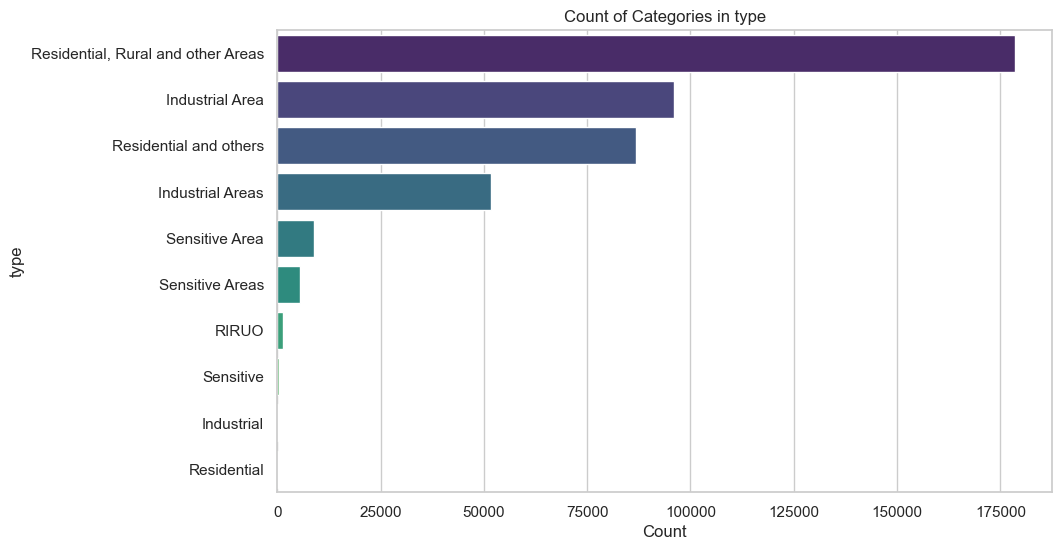

In [206]:
# Step 10: Bar Charts for Categorical Variables
categorical_cols = data.select_dtypes(include=['object']).columns

print("\n--- Bar Charts for Categorical Variables ---")
for col in categorical_cols:
    if data[col].nunique() < 20:  # Only plot for columns with <20 unique values
        plt.figure()
        sns.countplot(data=data, y=col, palette='viridis', order=data[col].value_counts().index)
        plt.title(f"Count of Categories in {col}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.show()


--- Box Plots for Outlier Detection ---


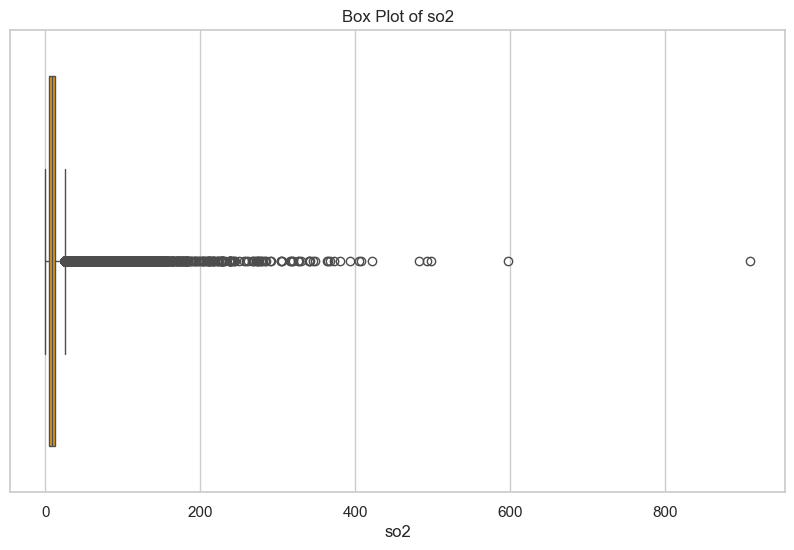

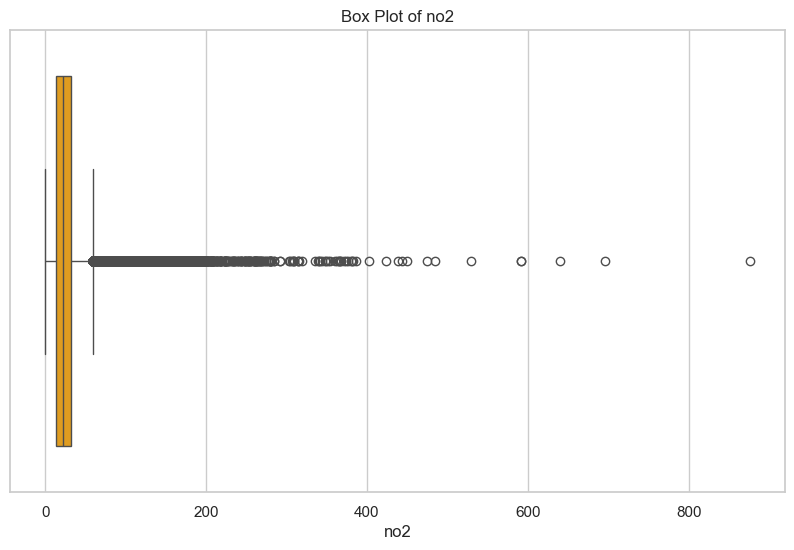

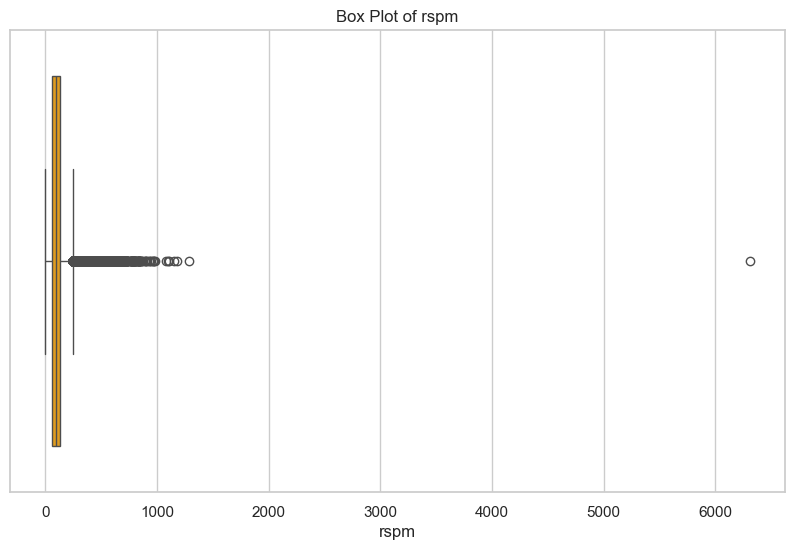

In [207]:
# Step 11: Box Plots for Outlier Detection in Numeric Columns
print("\n--- Box Plots for Outlier Detection ---")
for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=data, x=col, color='orange')
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()


In [208]:
# Step 12: Identify Anomalies or Outliers
print("\n--- Identifying Anomalies or Outliers ---")
outlier_summary = {}
for col in numeric_cols:
    q1 = data[col].quantile(0.25)  # First quartile
    q3 = data[col].quantile(0.75)  # Third quartile
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_summary[col] = outliers.shape[0]


--- Identifying Anomalies or Outliers ---


In [209]:
# Print outlier summary
print("Outliers detected in each numeric column:")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")

Outliers detected in each numeric column:
so2: 26624 outliers
no2: 19312 outliers
rspm: 19581 outliers



--- Air Quality Analysis ---


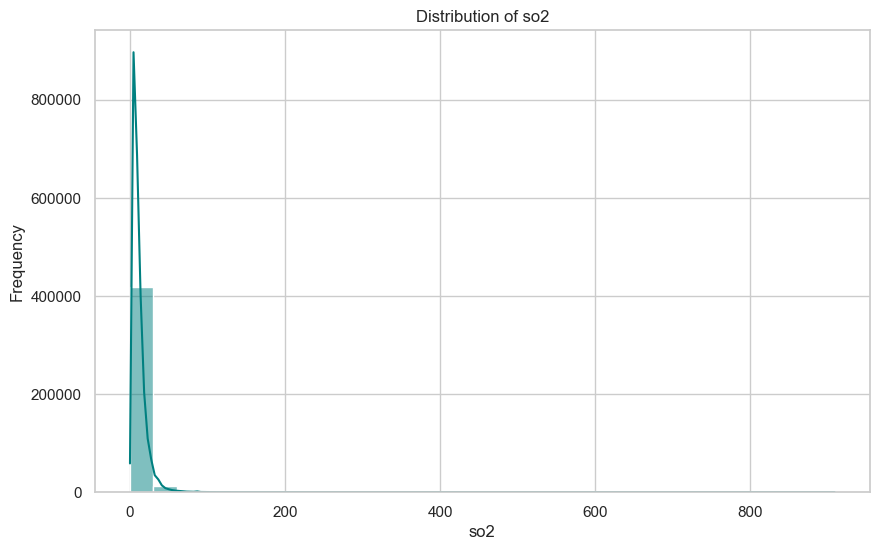


Basic Statistics for so2:
count    435065.000000
mean         10.830468
std          10.715279
min           0.000000
25%           5.000000
50%           9.000000
75%          13.000000
max         909.000000
Name: so2, dtype: float64


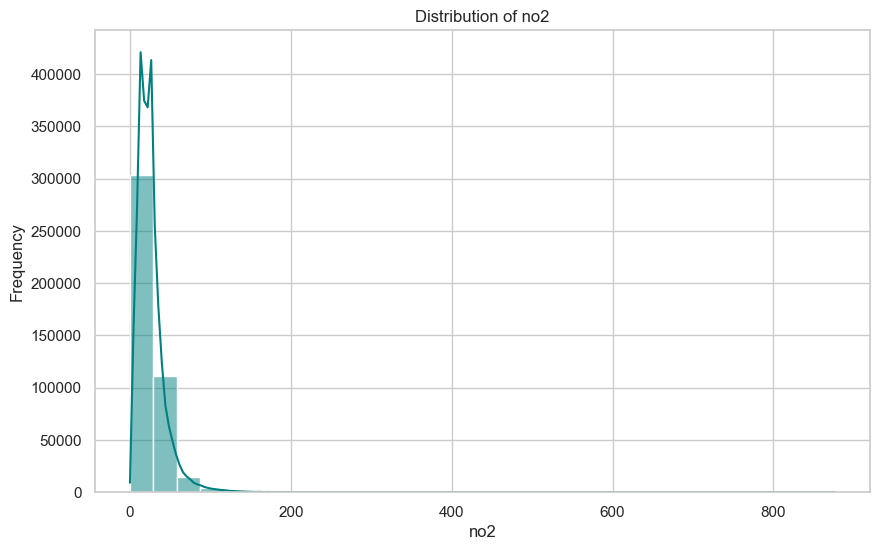


Basic Statistics for no2:
count    435065.000000
mean         25.823296
std          18.149807
min           0.000000
25%          14.000000
50%          22.300000
75%          32.000000
max         876.000000
Name: no2, dtype: float64


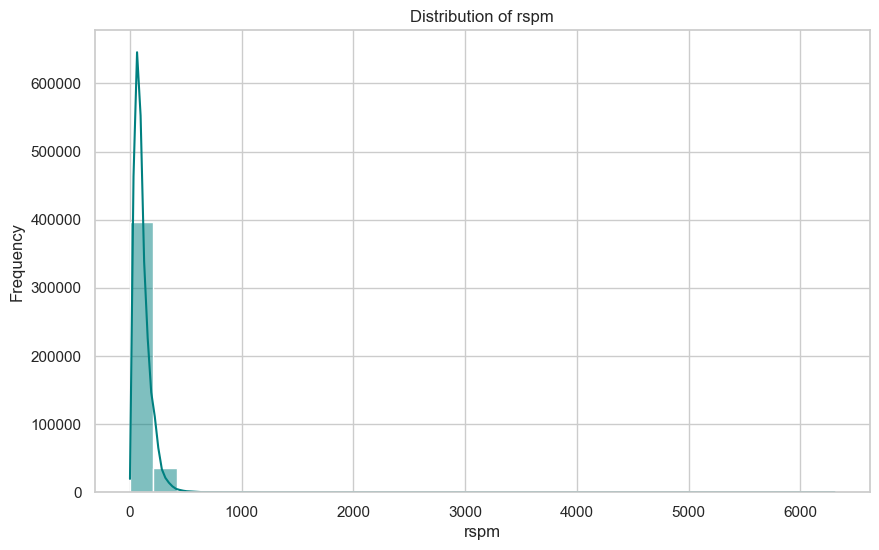


Basic Statistics for rspm:
count    435065.000000
mean        108.871711
std          71.369636
min           0.000000
25%          59.000000
50%          98.000000
75%         135.000000
max        6307.033333
Name: rspm, dtype: float64


In [210]:
# Step 13: Feature Analysis - Air Quality
air_quality_cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']  # Update based on dataset

print("\n--- Air Quality Analysis ---")
for col in air_quality_cols:
    if col in data.columns:
        plt.figure()
        sns.histplot(data[col], kde=True, bins=30, color='teal')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

        # Display basic statistics
        print(f"\nBasic Statistics for {col}:")
        print(data[col].describe())

In [211]:
# Step 14: Feature Analysis - Humidity (if available)
if 'humidity' in data.columns:
    print("\n--- Humidity Analysis ---")
    plt.figure()
    sns.histplot(data['humidity'], kde=True, bins=30, color='purple')
    plt.title("Distribution of Humidity")
    plt.xlabel("Humidity (%)")
    plt.ylabel("Frequency")
    plt.show()

    # Display basic statistics
    print("Basic Statistics for Humidity:")
    print(data['humidity'].describe())


--- Timestamps Analysis ---


C:\Users\rizwa\AppData\Local\Temp\ipykernel_6748\952943550.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='year', palette='coolwarm', order=sorted(data['year'].dropna().unique()))


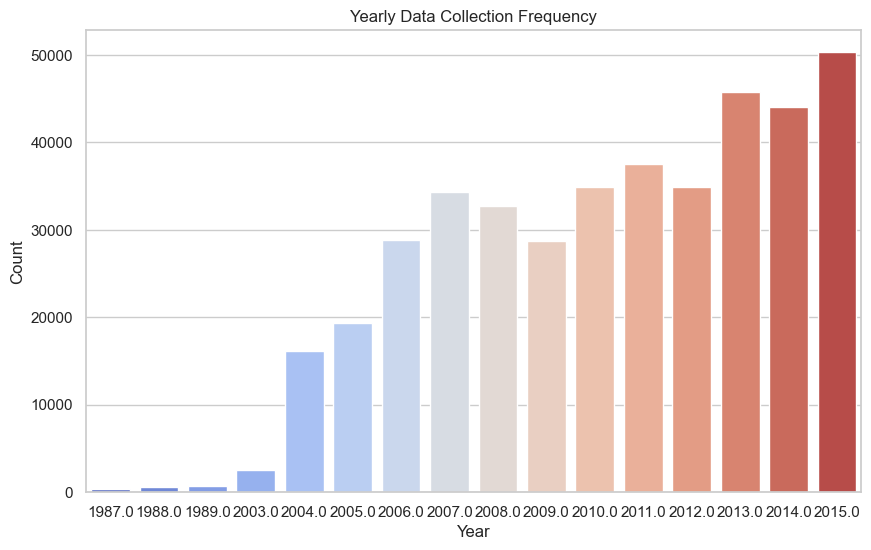

C:\Users\rizwa\AppData\Local\Temp\ipykernel_6748\952943550.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='month', palette='viridis', order=range(1, 13))


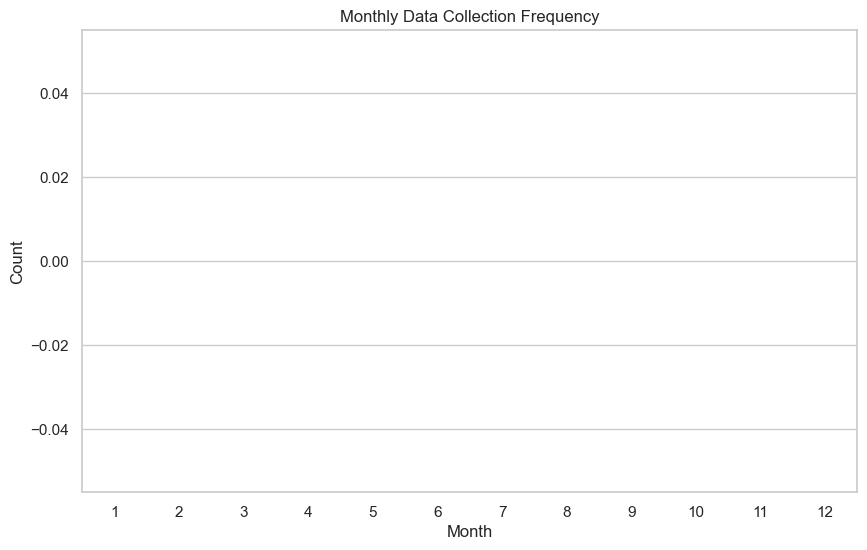

In [212]:
# Step 15: Feature Analysis - Timestamps
if 'sampling_date' in data.columns:
    print("\n--- Timestamps Analysis ---")
    # Convert sampling_date to datetime if not already
    data['sampling_date'] = pd.to_datetime(data['sampling_date'], errors='coerce')

    # Extract year, month, day for trend analysis
    data['year'] = data['sampling_date'].dt.year
    data['month'] = data['sampling_date'].dt.month

    # Yearly trends
    plt.figure()
    sns.countplot(data=data, x='year', palette='coolwarm', order=sorted(data['year'].dropna().unique()))
    plt.title("Yearly Data Collection Frequency")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.show()
    # Monthly trends
    plt.figure()
    sns.countplot(data=data, x='month', palette='viridis', order=range(1, 13))
    plt.title("Monthly Data Collection Frequency")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.show()

In [213]:
# Step 16: Customer Demographics (if available)
demographic_cols = ['age', 'gender', 'income']  # Update based on dataset
for col in demographic_cols:
    if col in data.columns:
        print(f"\n--- {col.capitalize()} Analysis ---")
        if col == 'age':
            plt.figure()
            sns.histplot(data[col], kde=True, bins=20, color='green')
            plt.title(f"Distribution of {col.capitalize()}")
            plt.xlabel(col.capitalize())
            plt.ylabel("Frequency")
            plt.show()

        elif col == 'gender':
            plt.figure()
            sns.countplot(data=data, x=col, palette='Set2')
            plt.title(f"Distribution of {col.capitalize()}")
            plt.xlabel(col.capitalize())
            plt.ylabel("Count")
            plt.show()

        elif col == 'income':
            plt.figure()
            sns.histplot(data[col], kde=True, bins=20, color='blue')
            plt.title(f"Distribution of {col.capitalize()}")
            plt.xlabel(col.capitalize())
            plt.ylabel("Frequency")
            plt.show()



--- Geographic Analysis ---


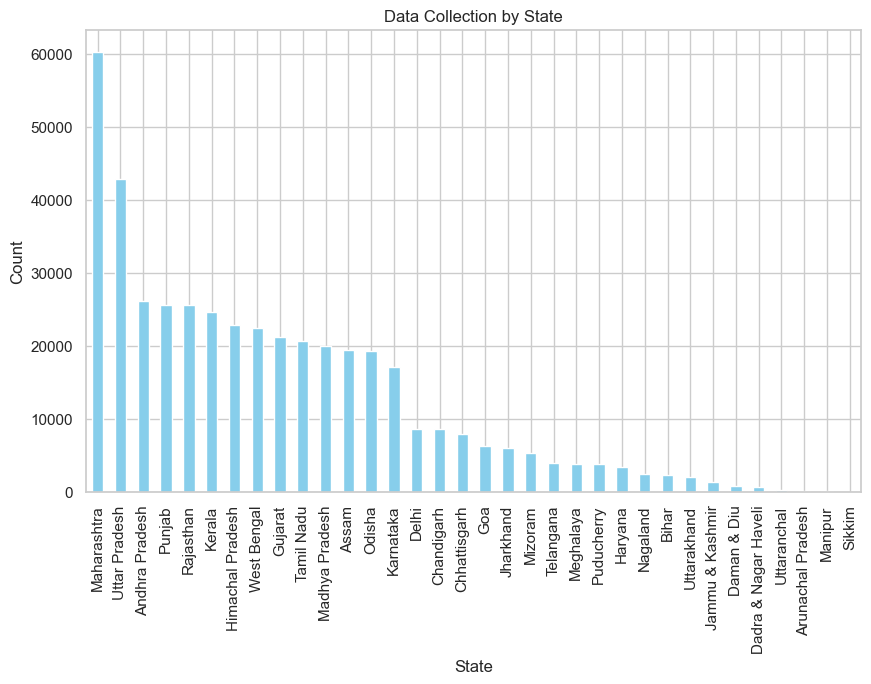

Top 5 States by Data Count:
state
Maharashtra       60286
Uttar Pradesh     42775
Andhra Pradesh    26158
Punjab            25634
Rajasthan         25566
Name: count, dtype: int64


In [214]:
# Step 17: Geographic Information (if available)
if 'state' in data.columns and 'location' in data.columns:
    print("\n--- Geographic Analysis ---")
    state_counts = data['state'].value_counts()
    plt.figure()
    state_counts.plot(kind='bar', color='skyblue')
    plt.title("Data Collection by State")
    plt.xlabel("State")
    plt.ylabel("Count")
    plt.show()

    print(f"Top 5 States by Data Count:\n{state_counts.head()}")

In [215]:
# Step 18: Ensure necessary data types
if 'sampling_date' in data.columns:
    data['sampling_date'] = pd.to_datetime(data['sampling_date'], errors='coerce')


In [216]:
# Step 19: Scatter Plot Analysis - Air Quality vs. Humidity
if 'humidity' in data.columns and 'so2' in data.columns:
    print("\n--- Scatter Plot: Air Quality vs Humidity ---")
    plt.figure()
    sns.scatterplot(data=data, x='humidity', y='so2', hue='state', palette='viridis', alpha=0.7)
    plt.title("Scatter Plot: SO2 Levels vs Humidity")
    plt.xlabel("Humidity (%)")
    plt.ylabel("SO2 Levels")
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

if 'humidity' in data.columns and 'pm2_5' in data.columns:
    plt.figure()
    sns.scatterplot(data=data, x='humidity', y='pm2_5', hue='state', palette='coolwarm', alpha=0.7)
    plt.title("Scatter Plot: PM2.5 Levels vs Humidity")
    plt.xlabel("Humidity (%)")
    plt.ylabel("PM2.5 Levels")
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


--- Correlation Matrix ---
            so2       no2      rspm      year     month
so2    1.000000  0.331957  0.141341 -0.109138 -0.019515
no2    0.331957  1.000000  0.339582 -0.075354 -0.029142
rspm   0.141341  0.339582  1.000000 -0.034620 -0.056081
year  -0.109138 -0.075354 -0.034620  1.000000 -0.017963
month -0.019515 -0.029142 -0.056081 -0.017963  1.000000


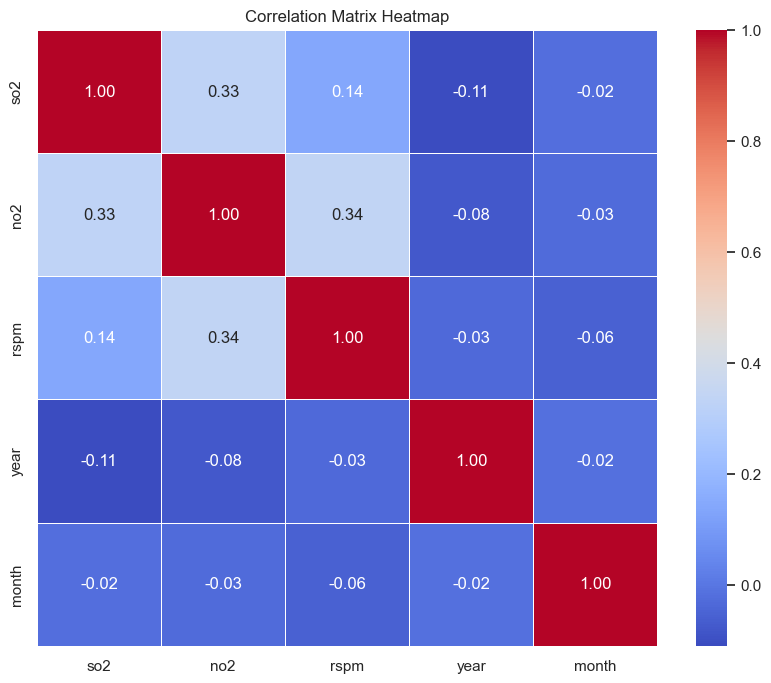

In [217]:
# Step 20: Correlation Matrix and Heatmap
print("\n--- Correlation Matrix ---")
numeric_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

# Heatmap Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()



--- Time-based Trends ---


C:\Users\rizwa\AppData\Local\Temp\ipykernel_6748\37632149.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_data['so2'].resample('M').mean().plot(label='SO2 Levels', legend=True, color='blue')


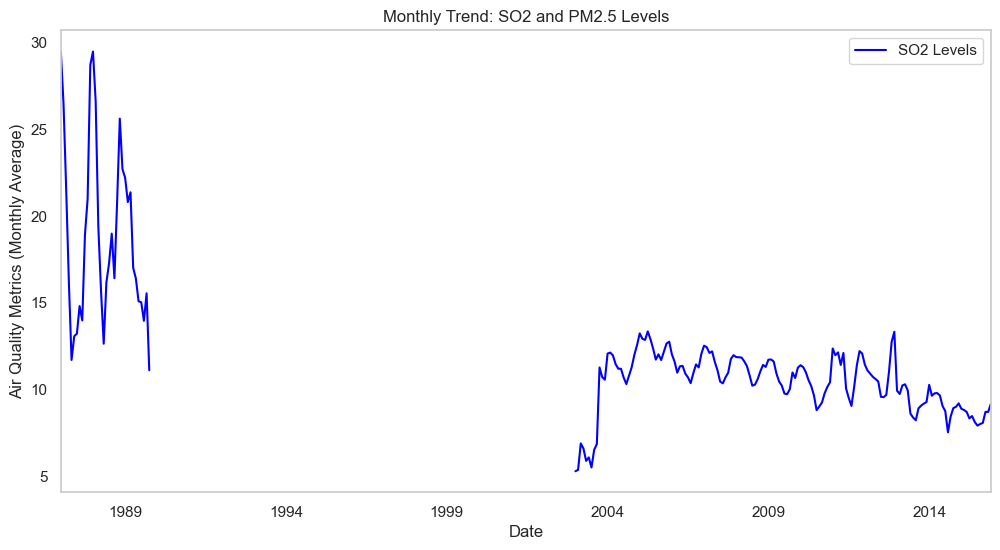

In [218]:
# Step 21: Time-based Trends - Air Quality over Time
if 'sampling_date' in data.columns:
    print("\n--- Time-based Trends ---")
    
    # Ensure sampling_date is in datetime format and set as the index
    data['sampling_date'] = pd.to_datetime(data['sampling_date'], errors='coerce')
    time_series_data = data.set_index('sampling_date')
    
    # Resample to monthly averages for selected air quality metrics
    plt.figure(figsize=(12, 6))
    if 'so2' in time_series_data.columns:
        time_series_data['so2'].resample('M').mean().plot(label='SO2 Levels', legend=True, color='blue')
    if 'pm2_5' in time_series_data.columns:
        time_series_data['pm2_5'].resample('M').mean().plot(label='PM2.5 Levels', legend=True, color='red', linestyle='--')
    
    # Plot settings
    plt.title("Monthly Trend: SO2 and PM2.5 Levels")
    plt.xlabel("Date")
    plt.ylabel("Air Quality Metrics (Monthly Average)")
    plt.legend()
    plt.grid()
    plt.show()




--- Pairplot for Air Quality and Humidity ---


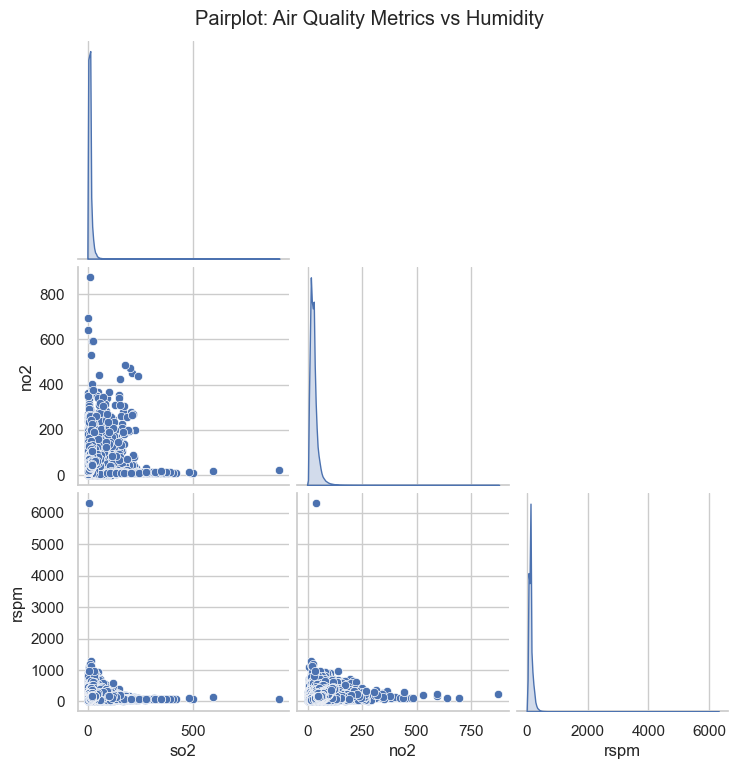

In [219]:
# Step 22: Pairplot for Relationships Between Variables
air_quality_cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5', 'humidity']  # Ensure these columns exist
available_cols = [col for col in air_quality_cols if col in data.columns]

if available_cols:  # Only proceed if at least one specified column is present
    subset_data = data[available_cols].dropna()

    print("\n--- Pairplot for Air Quality and Humidity ---")
    sns.pairplot(subset_data, diag_kind='kde', corner=True)
    plt.suptitle("Pairplot: Air Quality Metrics vs Humidity", y=1.02)
    plt.show()
else:
    print("No air quality or humidity columns found for pairplot.")


In [220]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = "cleaned_data.csv"  # Update with the path to your dataset
data = pd.read_csv(file_path)

# Step 23: Ensure 'sampling_date' is in datetime format
if 'sampling_date' in data.columns:
    data['sampling_date'] = pd.to_datetime(data['sampling_date'], errors='coerce')
    data = data.dropna(subset=['sampling_date'])  # Drop rows with invalid dates

# Step 24: Extract time-related features for seasonal analysis
data['year'] = data['sampling_date'].dt.year
data['month'] = data['sampling_date'].dt.month
data['day'] = data['sampling_date'].dt.day
data['day_of_week'] = data['sampling_date'].dt.dayofweek


C:\Users\rizwa\AppData\Local\Temp\ipykernel_6748\2200061937.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)



--- Seasonal Patterns: SO2 Levels ---


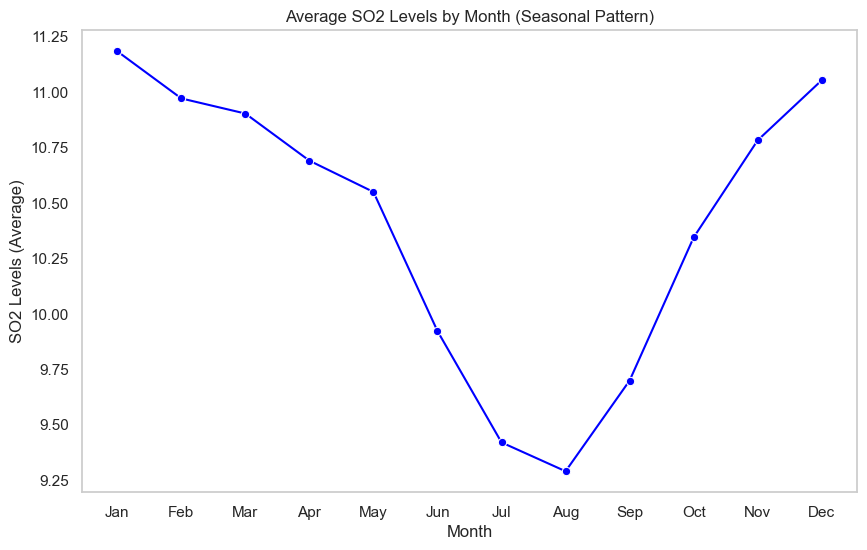

In [221]:
# Step 25: Seasonal Patterns in Air Quality
if 'so2' in data.columns:
    print("\n--- Seasonal Patterns: SO2 Levels ---")
    monthly_avg_so2 = data.groupby('month')['so2'].mean()
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=monthly_avg_so2.index, y=monthly_avg_so2.values, marker='o', color='blue')
    plt.title("Average SO2 Levels by Month (Seasonal Pattern)")
    plt.xlabel("Month")
    plt.ylabel("SO2 Levels (Average)")
    plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid()
    plt.show()

if 'pm2_5' in data.columns:
    print("\n--- Seasonal Patterns: PM2.5 Levels ---")
    monthly_avg_pm25 = data.groupby('month')['pm2_5'].mean()
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=monthly_avg_pm25.index, y=monthly_avg_pm25.values, marker='o', color='red')
    plt.title("Average PM2.5 Levels by Month (Seasonal Pattern)")
    plt.xlabel("Month")
    plt.ylabel("PM2.5 Levels (Average)")
    plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid()
    plt.show()

In [249]:
# Step 26: Peak Humidity Periods
if 'humidity' in data.columns:
    print("\n--- Peak Humidity Periods ---")
    monthly_avg_humidity = data.groupby('month')['humidity'].mean()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=monthly_avg_humidity.index, y=monthly_avg_humidity.values, marker='o', color='green')
    plt.title("Average Humidity Levels by Month (Seasonal Pattern)")
    plt.xlabel("Month")
    plt.ylabel("Humidity (%) (Average)")
    plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid()
    plt.show()

    # Identifying peak humidity months
    peak_humidity_month = monthly_avg_humidity.idxmax()
    print(f"Peak humidity occurs in month: {peak_humidity_month} ({['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][peak_humidity_month-1]})")

In [251]:
# Step 27: Cyclical Behavior in Humidity
if 'humidity' in data.columns:
    print("\n--- Cyclical Behavior: Daily Average Humidity ---")
    daily_avg_humidity = data.groupby('day_of_week')['humidity'].mean()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=daily_avg_humidity.index, y=daily_avg_humidity.values, palette='viridis')
    plt.title("Average Humidity by Day of Week")
    plt.xlabel("Day of Week")
    plt.ylabel("Humidity (%) (Average)")
    plt.xticks(range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.grid()
    plt.show()